In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LinReg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 

In [2]:
traineo = pd.read_csv('./data/salaries_data.csv')
traineo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [3]:
traineos = traineo.copy()

In [4]:
y = traineo.salary_in_usd

In [5]:
traineos.drop(columns = 'salary_in_usd', inplace = True)

In [6]:
testeo = pd.read_csv('./data/testeo.csv')
testeo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [7]:
total = pd.concat([traineos, testeo])
total.shape

(607, 10)

In [8]:
data_num = pd.DataFrame(StandardScaler().fit_transform(total._get_numeric_data()),  # standardize numeric columns
                      columns = total._get_numeric_data().columns).reset_index(drop=True)

data_obj = total.select_dtypes(include='object').reset_index(drop=True)  # get categoric columns

data = pd.concat([data_num, data_obj], axis = 1)

In [9]:
data.head()

,work_year,salary,remote_ratio,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,0.859977,-0.119080,0.714862,SE,FT,Data Engineer,USD,US,US,M
1,0.859977,-0.122482,0.714862,SE,FT,Data Engineer,USD,US,US,M
2,-0.586023,-0.145164,0.714862,MI,FT,BI Data Analyst,USD,US,US,M
3,-0.586023,-0.034995,0.714862,MI,CT,ML Engineer,USD,US,US,L
4,-0.586023,-0.195712,-1.743615,MI,FT,Data Engineer,EUR,RO,US,L


In [10]:
le=LabelEncoder()

for c in data.columns:
    if data.dtypes[c]==object:
        le.fit(data[c].astype(str))
        data[c]=le.transform(data[c].astype(str))

In [11]:
data.shape

(607, 10)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    float64
 1   salary              607 non-null    float64
 2   remote_ratio        607 non-null    float64
 3   experience_level    607 non-null    int64  
 4   employment_type     607 non-null    int64  
 5   job_title           607 non-null    int64  
 6   salary_currency     607 non-null    int64  
 7   employee_residence  607 non-null    int64  
 8   company_location    607 non-null    int64  
 9   company_size        607 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 47.5 KB


In [13]:
data.drop(columns = ['salary','salary_currency','employee_residence'], inplace = True)

In [14]:
data.reset_index(drop = True, inplace = True)

In [15]:
testeo_m = data[500:]
testeo_m.head()

,work_year,remote_ratio,experience_level,employment_type,job_title,company_location,company_size
500,-2.032024,-1.743615,3,2,41,29,2
501,-2.032024,0.714862,2,2,32,48,0
502,-2.032024,0.714862,2,2,12,48,0
503,-2.032024,-1.743615,2,2,38,9,1
504,-2.032024,0.714862,2,2,47,25,0


In [16]:
salaries_m = data[0:500]
salaries_m.head()

,work_year,remote_ratio,experience_level,employment_type,job_title,company_location,company_size
0,0.859977,0.714862,3,2,17,48,1
1,0.859977,0.714862,3,2,17,48,1
2,-0.586023,0.714862,2,2,5,48,1
3,-0.586023,0.714862,2,0,36,48,0
4,-0.586023,-1.743615,2,2,17,48,0


In [17]:
salaries_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         500 non-null    float64
 1   remote_ratio      500 non-null    float64
 2   experience_level  500 non-null    int64  
 3   employment_type   500 non-null    int64  
 4   job_title         500 non-null    int64  
 5   company_location  500 non-null    int64  
 6   company_size      500 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 27.5 KB


In [18]:
X = salaries_m

In [19]:
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression  

In [21]:
logreg = LogisticRegression(max_iter=2000)

logreg.fit(X_test, y_test)

LogisticRegression(max_iter=2000)

In [22]:
y_pred=logreg.predict(X_test)  

In [23]:
from sklearn.metrics import mean_squared_error as mse 

In [24]:
mse(y_test, y_pred, squared=False)

35406.63860577561

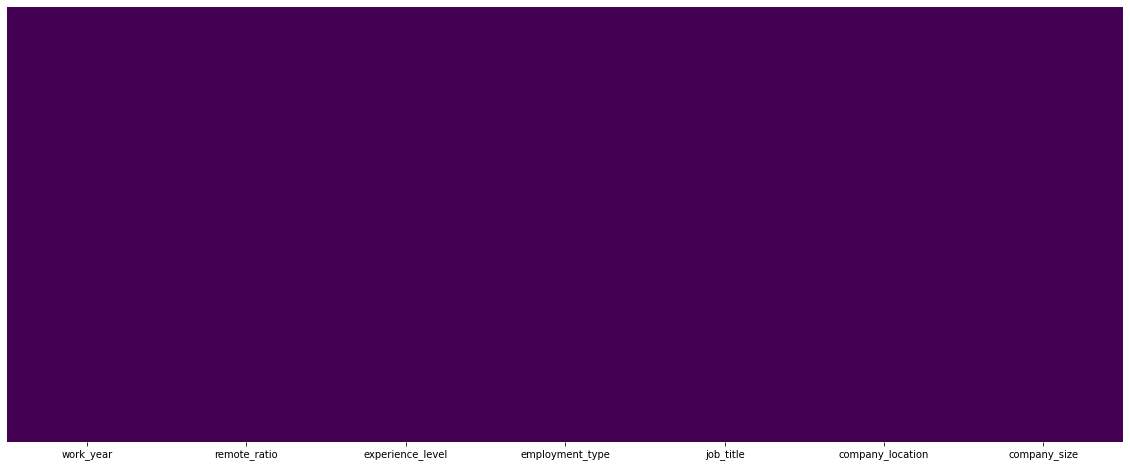

In [25]:
plt.figure(figsize=(20, 8))  

sns.heatmap(testeo_m.isna(), 
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [26]:
testeo_m.remote_ratio.value_counts()

 0.714862    61
-1.743615    25
-0.514377    21
Name: remote_ratio, dtype: int64

In [27]:
testeo_m.work_year.value_counts()

 0.859977    55
-0.586023    36
-2.032024    16
Name: work_year, dtype: int64

In [28]:
y_pred1 = logreg.predict(testeo_m)

In [29]:
y_pred1

array([ 62649, 102839, 110000,  88654,  62649,  20000, 412000,  75000,
         5679, 110000,  59102, 412000, 110000,  28399, 103160,  77684,
        43966, 100000,  62726, 100000, 184700,  75000,  88654, 105000,
        82528,  82528,  90000, 189650,  28399, 153667,  73000,  90000,
        62726,  40570,  88654,  91237, 214000,  91237,  88654, 105000,
        59102,  10000, 100000, 200000,  90000, 105000,  90000,  45807,
        90000, 103160,  90000,  40570, 140400, 167000, 106260,  45807,
       200000,  90000, 100000, 167000, 100000, 224000, 167000,  54000,
       189650, 100000, 100000, 167000, 132000,  40570, 184700, 167000,
        58000,  98158,   4000,  90000,  87932,  98158,  90000, 189650,
       130000,  28399, 224000, 105000, 100000,  45807,  45807, 200000,
       167000,  54238, 120000, 153667,  62649, 153667, 167000, 105000,
        59102,  40038,  18907, 184700, 167000, 100000, 100000, 100000,
       200000,  45807, 132000])

In [30]:
pruebas=pd.DataFrame(y_pred1,columns=['salary_in_usd'])
pruebas.to_csv('./data/pruebas.csv',index_label='id')